In [3]:
#import libraries and data set
import time
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import string
airPollutionData = pd.read_csv("AirQualityUCI.csv", delimiter=';',decimal=",") #The data contains ',' for the floating point
#Removing extra columns(for which we are not interested)
airPollutionSubset = airPollutionData[['Date', 'Time', 'CO(GT)', 'C6H6(GT)', 'NO2(GT)', 'T', 'RH']]
airPollutionSubset.head()

,Date,Time,CO(GT),C6H6(GT),NO2(GT),T,RH
0,10/03/2004,18.00.00,2.6,11.9,113.0,13.6,48.9
1,10/03/2004,19.00.00,2.0,9.4,92.0,13.3,47.7
2,10/03/2004,20.00.00,2.2,9.0,114.0,11.9,54.0
3,10/03/2004,21.00.00,2.2,9.2,122.0,11.0,60.0
4,10/03/2004,22.00.00,1.6,6.5,116.0,11.2,59.6


In [4]:
#Analyzing dataset
print('\033[4mColumn Names:\033[0m\n',list(airPollutionSubset.columns))

#Print data type of each column from left to right
print('\n\033[4mData type of each Feature:\033[0m\n')
print(airPollutionSubset.dtypes)

def TimeMinMax(timeColumn):
    # compute and print minimum and maximum values in Time feature
    # Input
    #  timeColumn : "Time" feature column 
    
    maxVal = minVal = time.strptime(str(timeColumn[0]), "%H.%M.%S") #initialize min and max value as the first value of column
    for i in range(timeColumn.size):                           #loop over each row
        if pd.notnull(timeColumn[i]) : 
            parsedTime = time.strptime(str(timeColumn[i]), "%H.%M.%S")
        
            #Logic for finding maximum value
            if maxVal.tm_hour < parsedTime.tm_hour :
                maxVal = parsedTime
            elif maxVal.tm_hour == parsedTime.tm_hour :
                if maxVal.tm_min < parsedTime.tm_min :
                    maxVal = parsedTime
                elif maxVal.tm_min == parsedTime.tm_min :
                    if maxVal.tm_sec < parsedTime.tm_sec :
                        maxVal = parsedTime
          
            #Logic for finding minimum value
            if minVal.tm_hour > parsedTime.tm_hour :
                minVal = parsedTime
            elif minVal.tm_hour == parsedTime.tm_hour :
                if minVal.tm_min > parsedTime.tm_min :
                    minVal = parsedTime
                elif minVal.tm_min == parsedTime.tm_min :
                    if minVal.tm_sec > parsedTime.tm_sec :
                        minVal = parsedTime
                    
    print('\n\033[4mMaximum and Minimum values of feature "Time":\033[m\n')
    print('Maximum value:', time.strftime("%H.%M.%S", maxVal))
    print('Minimum value:', time.strftime("%H.%M.%S", minVal))
    #end of def

#Call the function to print Maximum and Minimum values of "Time" feature
#Passing only the "Time" column as an argument
TimeMinMax(airPollutionSubset['Time'])


# function for calulating the mean, standard deviation, minimum and maximum of numeric features
def featureStatistics(featureName, featureValues):
    # compute and print mean, standard deviation, minimum and maximum values of numeric features
    # Input
    #  featureName : Name of the column(feature) 
    #  featureValues : All the values in the column
    #print(featureValues)
    print('\033[4mFeature:',featureName, '\033[0m')
    print('  Mean: '+ str(featureValues.mean()))
    print('  Standard Deviation: '+ str(featureValues.std()))
    print('  Minimum Value: '+ str(featureValues.min()))
    print('  Maximum Value: '+ str(featureValues.max())+'\n')
    #end of def

    
#iterating through each numeric (non time) columns
print('\n\033[4mMean, Standard Deviation, Minimum and Maximum of Numeric Features:\033[0m')
for i in airPollutionSubset.columns[2:7]:
    #print(airPollutionSubset[i])
    featureStatistics(i, airPollutionSubset[i])


Column Names:
 ['Date', 'Time', 'CO(GT)', 'C6H6(GT)', 'NO2(GT)', 'T', 'RH']

Data type of each Feature:

Date         object
Time         object
CO(GT)      float64
C6H6(GT)    float64
NO2(GT)     float64
T           float64
RH          float64
dtype: object

Maximum and Minimum values of feature "Time":

Maximum value: 23.00.00
Minimum value: 00.00.00

Mean, Standard Deviation, Minimum and Maximum of Numeric Features:
Feature: CO(GT) 
  Mean: -34.20752377898902
  Standard Deviation: 77.65717034682939
  Minimum Value: -200.0
  Maximum Value: 11.9

Feature: C6H6(GT) 
  Mean: 1.8656834455487832
  Standard Deviation: 41.3802064363003
  Minimum Value: -200.0
  Maximum Value: 63.7

Feature: NO2(GT) 
  Mean: 58.14887250187026
  Standard Deviation: 126.94045525890907
  Minimum Value: -200.0
  Maximum Value: 340.0

Feature: T 
  Mean: 9.778305012290337
  Standard Deviation: 43.20362306262309
  Minimum Value: -200.0
  Maximum Value: 44.6

Feature: RH 
  Mean: 39.48537992946447
  Standard Deviat

In [22]:
def dateTimeMerger(row):   
    # Function to merge "Date" and "Time" columns 
    # Input
    #  each row of the airPollutionData dataframe
    timeTemp = time.strptime(str(row['Time']),"%H.%M.%S")
    dateTemp = time.strptime(str(row['Date']),"%d/%m/%Y")
    
    timeNewFormat = datetime.datetime.combine(datetime.date(dateTemp.tm_year, dateTemp.tm_mon, dateTemp.tm_mday),
                                      datetime.time(timeTemp.tm_hour, timeTemp.tm_min))
    return timeNewFormat
    #end of def

#Function call for merging "Date" and "Time" columns 
airPollutionSubsetNoNan = pd.DataFrame()
airPollutionSubset.dropna(subset = ["Date"], inplace=True)
airPollutionSubset.dropna(subset = ["Time"], inplace=True)
airPollutionSubset['Datetime'] = airPollutionSubset.apply(dateTimeMerger, axis = 1)
airPollutionSubset.drop(['Date', 'Time'], axis=1, inplace=True) #"Date" and "Time" columns dropped as per the requirement
print(airPollutionSubset)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


      CO(GT)  C6H6(GT)  NO2(GT)     T    RH            Datetime
0        2.6      11.9    113.0  13.6  48.9 2004-03-10 18:00:00
1        2.0       9.4     92.0  13.3  47.7 2004-03-10 19:00:00
2        2.2       9.0    114.0  11.9  54.0 2004-03-10 20:00:00
3        2.2       9.2    122.0  11.0  60.0 2004-03-10 21:00:00
4        1.6       6.5    116.0  11.2  59.6 2004-03-10 22:00:00
...      ...       ...      ...   ...   ...                 ...
9352     3.1      13.5    190.0  21.9  29.3 2005-04-04 10:00:00
9353     2.4      11.4    179.0  24.3  23.7 2005-04-04 11:00:00
9354     2.4      12.4    175.0  26.9  18.3 2005-04-04 12:00:00
9355     2.1       9.5    156.0  28.3  13.5 2005-04-04 13:00:00
9356     2.2      11.9    168.0  28.5  13.1 2005-04-04 14:00:00

[9357 rows x 6 columns]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


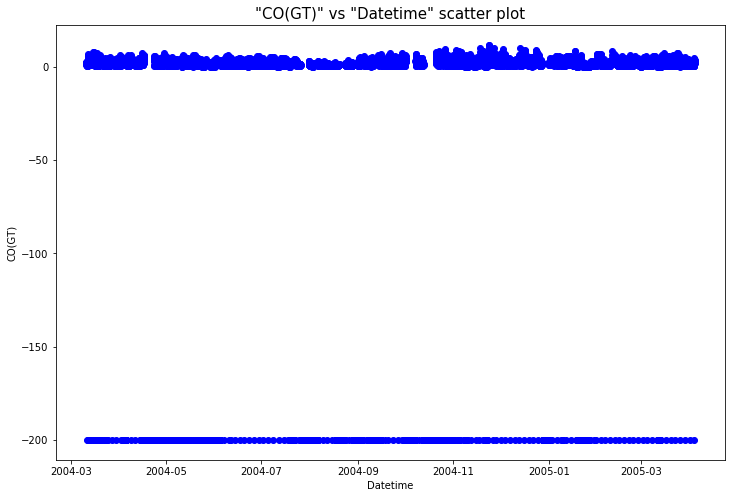

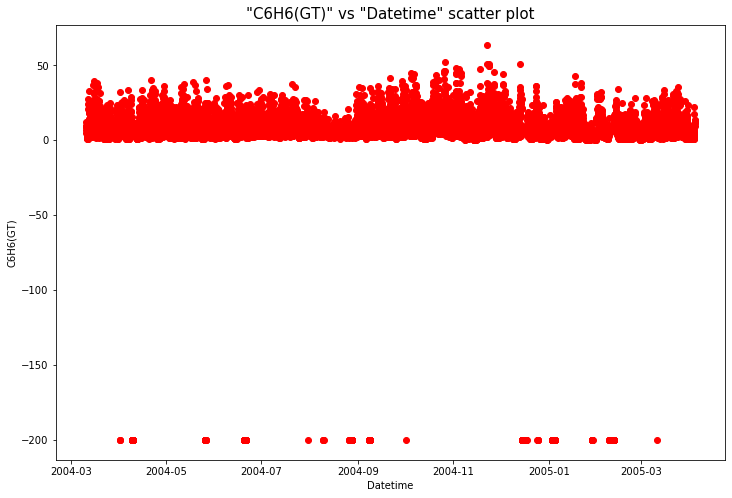

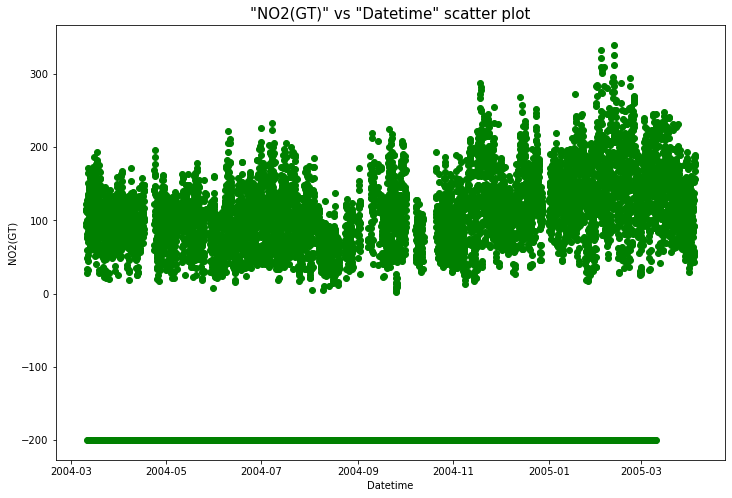

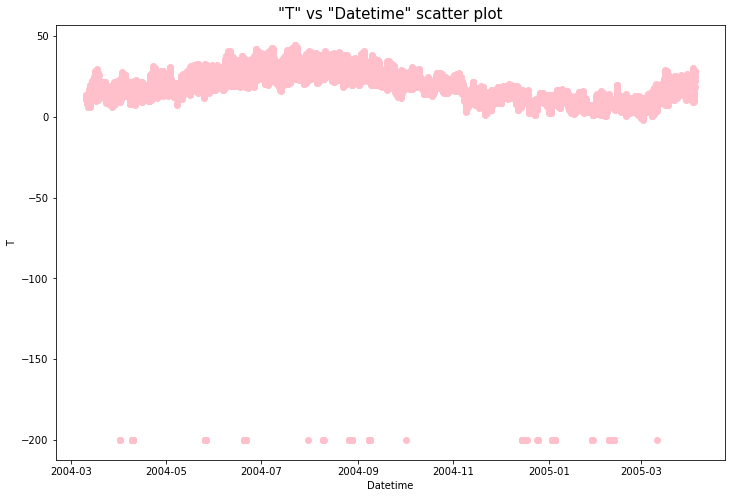

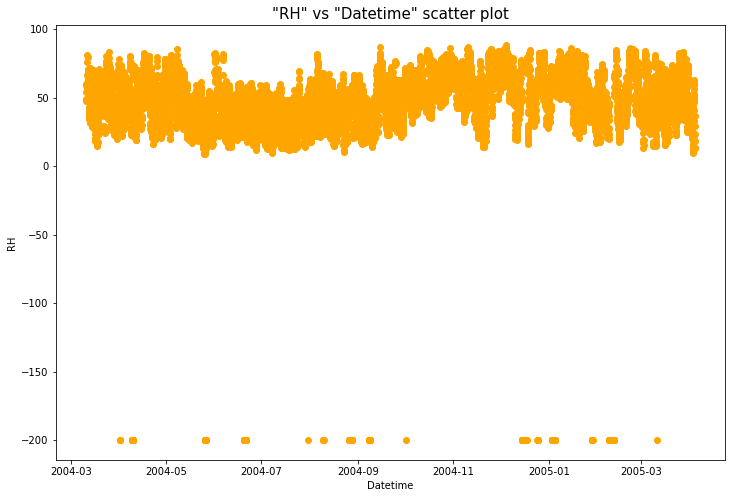

In [23]:
def featurePlot(argFeatures):
    # Function to plot all the numeric features against time
    # Input
    #  argFeatures : All the columns of the airPollutionData
    colorList = ['b', 'r', 'g', 'pink', 'orange'] #colorList for representing each plot with different color
    
    for i in range(0,5):
        plt.figure(figsize = (12,8))
        titleString = '"' + argFeatures[i] + '"' + ' vs "Datetime" scatter plot'
        plt.title(titleString, fontsize = 15)
        plt.xlabel('Datetime')
        plt.ylabel(argFeatures[i])
        plt.plot_date(airPollutionSubset['Datetime'], airPollutionSubset[argFeatures[i]], color = colorList[i])
        
    #end def

#Scatter plot for all the features over time
featurePlot(list(airPollutionSubset.columns))

In [25]:
#1) Mean, standard deviation, minimum and maximum, while ignoring implausible values.
# function for calulating the mean, standard deviation, minimum and maximum of numeric features
def statsWithoutErrorValue(featureName, featureValues):
    # compute and print mean, standard deviation, minimum and maximum values of numeric features after removing wrong value
    # Input
    #  featureName : Name of the column(feature) 
    #  featureValues : All the values in the column
    # Output
    #  retVal : The mean value of the column for which stats are being calculated after excluding the error value 
    
    columnValues = featureValues.copy()
    for item in columnValues.iteritems():
        if item[1] < 0:
             columnValues.drop(labels=[item[0]], inplace=True)
    
    retVal = columnValues.mean()
    print('\033[4mFeature:',featureName,'\033[0m')
    print('  Mean: '+ str(retVal))
    print('  Standard Deviation: '+ str(columnValues.std()))
    print('  Minimum Value: '+ str(columnValues.min()))
    print('  Maximum Value: '+ str(columnValues.max()))
    print('  Total number of data rows :'+ str(len(columnValues)) +'\n')   

    return retVal
    #end of def

colMean = list() #The list which contains the column mean values calculated by excluding error value 
print('\n\033[4m1) Mean, Standard Deviation, Minimum and Maximum of Numeric Features while ignoring the missing and implausible values\033[0m')

index = 0
for i in airPollutionSubset.columns[0:5]: # loop through 5 numeric columns
    colMean.append(statsWithoutErrorValue(i, airPollutionSubset[i]))
    index += 1

#2) Creating a cleaned dataset with all implausible values handled accordingly.
index = 0
#iterating through each numeric (non time) columns
for i in airPollutionSubset.columns[0:5]: # loop through 5 numeric columns
    airPollutionSubset.loc[airPollutionSubset[i] < 0, i] = colMean[index] # replace values less than 0 with mean value of column
    index += 1

print('\n\033[4m2) Cleaned dataset with all implausible values handled accordingly.\033[0m')
print(airPollutionSubset)

#3) Mean, standard deviation, minimum and maximum with respect to your cleaned data set
#Utilizing the function defined in part (a) of Question 1
print('\n\033[4m3) Mean, Standard Deviation, Minimum and Maximum of Numeric Features of Cleaned dataset\033[0m')
for i in airPollutionSubset.columns[0:5]:
    featureStatistics(i, airPollutionSubset[i])
    print('  Number of Data rows: '+ str(len(airPollutionSubset[i]))+'\n')


1) Mean, Standard Deviation, Minimum and Maximum of Numeric Features while ignoring the missing and implausible values
Feature: CO(GT) 
  Mean: 2.152749543914531
  Standard Deviation: 1.3160683129140403
  Minimum Value: 0.1
  Maximum Value: 11.9
  Total number of data rows :9357

Feature: C6H6(GT) 
  Mean: 10.0831053275497
  Standard Deviation: 7.302650251426706
  Minimum Value: 0.1
  Maximum Value: 63.7
  Total number of data rows :9357

Feature: NO2(GT) 
  Mean: 113.09125081011054
  Standard Deviation: 43.92095410428
  Minimum Value: 2.0
  Maximum Value: 340.0
  Total number of data rows :9357

Feature: T 
  Mean: 18.34553352639759
  Standard Deviation: 8.628144945239944
  Minimum Value: 0.0
  Maximum Value: 44.6
  Total number of data rows :9357

Feature: RH 
  Mean: 49.23420086753405
  Standard Deviation: 16.97480129898246
  Minimum Value: 9.2
  Maximum Value: 88.7
  Total number of data rows :9357


2) Cleaned dataset with all implausible values handled accordingly.
      CO(GT) 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
